In [7]:
%matplotlib notebook
# starter code
import random
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
from graph_tool.all import load_graph, shortest_distance, GraphView, shortest_path
from networkx.drawing.nx_agraph import graphviz_layout

from ic import simulate_cascade, observe_cascade, get_gvs, get_o2src_time, get_infection_time, gen_nontrivial_cascade
from utils import get_rank_index, extract_edges

seed = 123456
random.seed(seed)
np.random.seed(seed)

gtype = 'grid'
g = load_graph('data/{}/2-6/graph.gt'.format(gtype))
gnx = nx.read_graphml('data/{}/2-6/graph.graphml'.format(gtype))
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
N1, N2 = 100, 100
p, q = 0.5, 0.5

gvs = get_gvs(g, p, N2)
pos = graphviz_layout(gnx, root=0)

In [6]:
from steiner_tree_order import remove_redundant_edges_from_tree, temporal_bfs_sync, tree_sizes_by_roots

In [110]:
for i in tqdm(range(10)):    
    infection_times, source, obs_nodes, true_tree = gen_nontrivial_cascade(g, p, q, return_tree=True)
    tree_source = temporal_bfs_sync(g, source, infection_times, source, obs_nodes, debug=False)
    len(extract_edges(tree_source))

100%|██████████| 10/10 [00:01<00:00,  8.24it/s]


In [120]:
ranks = []
for i in tqdm(range(10)):
    infection_times, source, obs_nodes, true_tree = gen_nontrivial_cascade(g, p, q, return_tree=True)
    
    r2tree_size = tree_sizes_by_roots(g, obs_nodes, infection_times, source, 'sync_tbfs')

    winner = np.argmax(r2tree_size)
    tree_source = temporal_bfs_sync(g, source, infection_times, source, obs_nodes, debug=False)
    tree_best = temporal_bfs_sync(g, winner, infection_times, source, obs_nodes, debug=False)
    
    source_rank = get_rank_index(r2tree_size, source)
    ranks.append(source_rank)
    if source_rank >= 10:
        print(r2tree_size[source])
        print(np.sort(r2tree_size))
        print(np.sort(r2tree_size))
        print(np.argsort(r2tree_size))        
        break
        # print(source_rank)    
        # break

100%|██████████| 10/10 [03:01<00:00, 14.46s/it]


In [121]:
ranks

[3.0, 3.0, 0.0, 1.0, 2.0, 0.0, 8.0, 3.0, 0.0, 6.0]

In [97]:
r2tree_size = tree_sizes_by_roots(g, obs_nodes, infection_times, source, 'sync_tbfs')

winner = np.argmax(r2tree_size)
tree_source = temporal_bfs_sync(g, source, infection_times, source, obs_nodes, debug=False)
tree_best = temporal_bfs_sync(g, winner, infection_times, source, obs_nodes, debug=False)

source_rank = get_rank_index(r2tree_size, source)
print(source_rank)

In [103]:
print(source)
print(r2tree_size[source])
print(np.sort(r2tree_size))
print(np.argsort(r2tree_size))

4
-30.0
[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -37. -36. -36. -35. -35. -34. -34. -34. -34.
 -34. -34. -34. -34. -34. -33. -33. -33. -33. -33. -33. -33. -32. -32. -32.
 -32. -31. -31. -31. -31. -30. -30. -30. -30. -30. -30. -29. -29. -29. -29.
 -29. -29. -29. -28.]
[63 29 30 62 37 14 43 45 48 19 51 53  7  6  5 54 56 60 61 52 27  0 59 57  1
 58 42 24 49 50 41 40 32 33 46 38 55 34 16  2 25 47 39 17  8 26  9  3 31 18
 10  4 15 35 28 23 12 44 21 36 20 11 22 13]


<IPython.core.display.Javascript object>


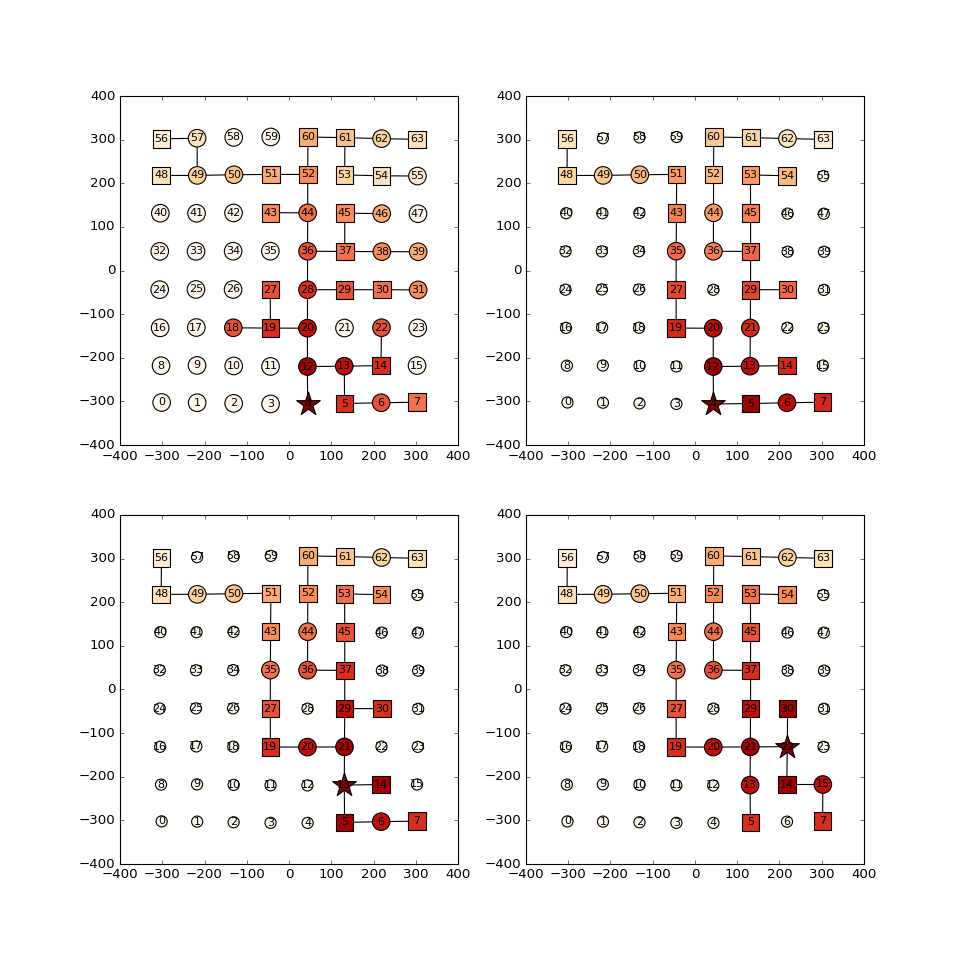

In [104]:
from plot_utils import plot_snapshot

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True, ax=ax[0, 0],
              edges=extract_edges(true_tree))

if True:
    plot_snapshot(gnx, pos, get_infection_time(tree_source, source), queried_nodes=obs_nodes, source_node=source, with_labels=True,
                  ax=ax[0, 1],
                  edges=extract_edges(tree_source))
if True:    
    plot_snapshot(gnx, pos, get_infection_time(tree_best, winner), queried_nodes=obs_nodes, source_node=winner, with_labels=True,
                  ax=ax[1, 0],
                  edges=extract_edges(tree_best))
if True:    
    root = 22
    some_tree = temporal_bfs_sync(g, root, infection_times, source, obs_nodes, debug=False)    
    plot_snapshot(gnx, pos, get_infection_time(some_tree, root), queried_nodes=obs_nodes, source_node=root, with_labels=True,
                  ax=ax[1, 1],
                  edges=extract_edges(some_tree))
    